# Исследование популярности игр

Интернет магазин, продающий по всему миру компьютерные игры, просит провести исследование по определению успешности игр разных платформ. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Планируем кампанию на 2017-й, есть данные до 2016 года.

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

## Обзор данных


In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов, типы данных object  и float64. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Названия столбцов:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board)

Ассоциация ESRB  (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»

Данные за 2016 год могут быть неполными.

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Выводы**

Чтобы двигаться дальше, нужно устранить проблемы в данных. Встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.
Посмотрим какие значения в столбцах. Определим и изучим пропущенные значения: заполним пропуски, где это уместно. 

## Предобработка данных


### Стиль заголовков
Выведем на экран названия столбцов:


In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Переменуем столбцы согласно хорошему стилю:

In [7]:
df= df.rename(columns = {'Name':'name','Platform':'platform','Year_of_Release':'year_of_release',
                         'Genre':'genre' ,'NA_sales':'na_sales','EU_sales':'eu_sales',
                         'JP_sales':'jp_sales','Other_sales':'other_sales',
                         'Critic_Score':'critic_score' ,'User_Score':'user_score','Rating':'rating'})

In [8]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изучим столбцы:

#### Изучим столбец названия игр:

In [9]:
df['name'].value_counts()

Need for Speed: Most Wanted        12
Madden NFL 07                       9
LEGO Marvel Super Heroes            9
Ratatouille                         9
FIFA 14                             9
                                   ..
My Frogger: Toy Trials              1
Montessori Music                    1
World Stadium 4                     1
The Settlers: Rise of an Empire     1
Double Dragon                       1
Name: name, Length: 11559, dtype: int64

Приведём все названия к нижнему регистру:

In [10]:
df['name'] = df['name'].str.lower()
df['name'].value_counts()

need for speed: most wanted          12
madden nfl 07                         9
ratatouille                           9
fifa 14                               9
lego marvel super heroes              9
                                     ..
madden football 64                    1
san-x land: theme park de asobou!     1
game hits!                            1
realsports baseball                   1
amnesia crowd                         1
Name: name, Length: 11559, dtype: int64

In [11]:
df.duplicated().sum()

0

Количество игр в столбце не уменьшилось, значит неявных дубликатов из-за разного регистра нет. 

Явных дубликатов во всей таблице тоже нет.

Отсортируем названия игр и посмотрим, какие есть названия:

In [12]:
df['name'].sort_values().head(15)

14983                             beyblade burst
1079                           fire emblem fates
3358                        frozen: olaf's quest
3862                        frozen: olaf's quest
13794                 haikyu!! cross team match!
2454                           tales of xillia 2
4728                                 '98 koshien
8342                  .hack//g.u. vol.1//rebirth
7087                .hack//g.u. vol.2//reminisce
8597     .hack//g.u. vol.2//reminisce (jp sales)
8293               .hack//g.u. vol.3//redemption
1561                     .hack//infection part 1
9063                                 .hack//link
2990                      .hack//mutation part 2
4265                      .hack//outbreak part 3
Name: name, dtype: object

In [13]:
df['name'].sort_values().tail(25)

12684                                     zoo tycoon 2
5986                                   zoo tycoon 2 ds
6563                 zoo tycoon 2: ultimate collection
2103                                     zoo tycoon ds
12626                  zoo tycoon: complete collection
14216                      zoo vet: endangered animals
9466                          zoobles! spring to life!
13251                                          zoocube
14998                                          zoocube
13308                                             zoop
10096                                             zubo
119                                      zumba fitness
3516                                     zumba fitness
669                                      zumba fitness
520                                    zumba fitness 2
13172                               zumba fitness core
12439                               zumba fitness core
8049                                zumba fitness rush
7137      

В данном столбце нет возможности грамотно провести лемматизацию или стемминг для поиска неявных дубликатов, поскольку разница между похожими названиями не в формах слов, а в дополнительных словах/символах.
Кроме того,  для игр довольно сложно говорить о том, дубликаты это или нет. Ведь например, сложно сказать, что zoo tycoon 2 и zoo tycoon 2 ds это одно и тоже или нет. ds может значит какое-нибудь дополнение, например.

Игра
.hack имеет следующие названия:
- .hack//g.u. vol.2//reminisce
- .hack//g.u. vol.2//reminisce (jp sales)

Похоже, что в одной строке все продажи кроме Японии, в в jp sales то, что продали в Японии. Посмотрим, много ли таких игр.

In [14]:
def find_sales(name):
    try:
      if 'sale' in name:
        return name
    except: #функция падает, когда название игры типа float (это или число или Nan)
      return

In [15]:
df['name_with_sales'] = df['name'].apply(find_sales)

In [16]:
name_with_sales = df['name_with_sales'].unique()

In [17]:
len(name_with_sales)

149

In [18]:
name_with_sales

array([None, 'project gotham racing (jp weekly sales)',
       'medal of honor: european assault (all region sales)',
       'nba live 06 (all region sales)',
       "tony hawk's american wasteland (old all region sales)",
       "tony hawk's american wasteland (weekly american sales)",
       'nba live 06 (weekly american sales)',
       'ratchet & clank: up your arsenal (weekly american sales)',
       'midnight club 3: dub edition (america weekly sales)',
       'tetris 2 (all region sales)',
       'world soccer winning eleven 9 (jp & others sales)',
       'yu-gi-oh! the sacred cards (american and others sales)',
       'pokémon mystery dungeon: red rescue team (us weekly sales)',
       'winning eleven: pro evolution soccer 2007 (all region sales)',
       'summer sports: paradise island (others sales)',
       'virtua tennis: world tour (us & others sales)',
       'the godfather (old us sales)', 'secret agent clank(us sales)',
       'international superstar soccer 2000 (all re

Всего 148 значений, в которых есть замечания по продажам. Часть уточнений не про продажи в Японии, а про недельные продажи, или "наши продажи" - эту информацию нереально грамотно объединить с общей иформацией о продажах.

Поскольку всего игр перечислено 16,7 тысяч, считаем, что 150 игр с непонятными продажами не сильно повлияют на исследование. Оставим эти значения такими, какие они есть.

In [19]:
df['name'].isna().sum()

2

В столбце есть два пропуска, восстановить их нереально. Удалим строки с этими пропусками:

In [20]:
df = df.dropna(subset=['name']).reset_index(drop=True)

#### Изучим столбец названия платформ:

In [21]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Пропущенных значений нет, данные выглядят адекватно.

#### Изучим столбец года выпуска:

Посмотрим, какие значения встречаются в этом столбце:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3731cf7e10>]],
      dtype=object)

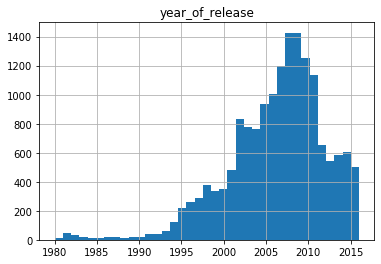

In [22]:
df.hist(column='year_of_release',
              bins=37)   

Данные выглядят адекватно, переведём столбец в тип int. Есть 269 пропущенных значений...

Заменим пропуски на медианные значения года выпуска согласно платформе, на которую игра была выпущена:

In [23]:
#Создадим новый столбец, в котором указаны медианные значения года выпуска игр для каждой строки согласно типу платформы
median_year_of_release = df.groupby('platform')['year_of_release'].transform('median')
median_year_of_release

0        2009.0
1        1986.5
2        2009.0
3        2009.0
4        1997.0
          ...  
16708    2011.0
16709    2010.0
16710    2014.0
16711    2003.0
16712    2014.0
Name: year_of_release, Length: 16713, dtype: float64

In [24]:
# заполним все пустые значения выхода игры на медианные значения из нового столбца
df['year_of_release'] = df['year_of_release'].fillna(median_year_of_release)

In [25]:
df['year_of_release'].isna().sum()

0

Пропущенных значений нет, переведём в тип int:

In [26]:
df['year_of_release'] = df['year_of_release'].astype('int')

#### Изучим столбец названия жанра:

In [27]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Данные в столбце выглядят адекватно.

In [28]:
df['genre'].isna().sum()

0

В столбце присутствует 2 пропущеных значения, удалим эти строки из таблицы.

In [29]:
df = df.dropna(subset=['genre']).reset_index(drop=True)

#### Изучим столбец количества продаж в северной америке:

Построим гистограмму распределения количества продаж, по оси х миллионы копий.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372779ee10>]],
      dtype=object)

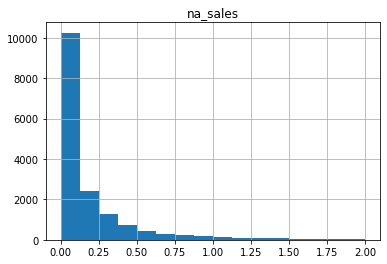

In [30]:
df.hist(column='na_sales',
        bins=16,
        range=(0,2))   

In [31]:
df['na_sales'].value_counts()

0.00    4507
0.02     576
0.03     561
0.04     549
0.01     545
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: na_sales, Length: 402, dtype: int64

In [32]:
df['na_sales'].max()

41.36

In [33]:
df['na_sales'].isna().sum()

0

В этом столбце пропущенных значений нет, но есть много нулевых значений. Заменим нулевые значения на средние согласно году выпуска игры.

In [34]:
#Создадим новый столбец, в котором указаны средние значения проданных копий игр в северной америке для каждой строки согласно году выпуска
mean_na_sales = df.groupby('year_of_release')['na_sales'].transform('mean')
df['mean_na_sales']=mean_na_sales

In [35]:
df['mean_na_sales']

0        0.260567
1        2.409286
2        0.240755
3        0.235420
4        0.329886
           ...   
16708    0.089502
16709    0.260567
16710    0.089502
16711    0.248188
16712    0.089502
Name: mean_na_sales, Length: 16713, dtype: float64

In [36]:
df.loc[df['mean_na_sales'] == 0]['mean_na_sales'].count()

0

Нулевых средних значений продаж в северной америке нет.
Поменяем все нулевые значения продаж на средние:

In [37]:
# заполним все пустые значения продаж на медианные значения из нового столбца
df.loc[df['na_sales'] == 0,'na_sales'] = df.loc[df['na_sales'] == 0,'mean_na_sales']

In [38]:
df.query('na_sales == 0')['na_sales'] 

Series([], Name: na_sales, dtype: float64)

In [39]:
df['na_sales'].min()

0.01

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37276df690>]],
      dtype=object)

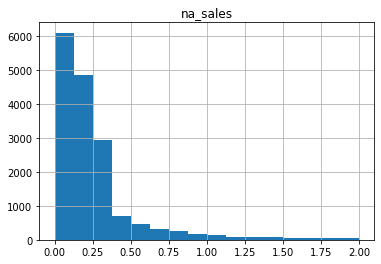

In [40]:
df.hist(column='na_sales',
        bins=16,
        range=(0,2))   

Данные из этого столбца выглядят адекватно. Пропущенных и нулевых значений нет.

#### Изучим столбец количества продаж в европе:

Построим гистограмму распределения количества продаж, по оси х миллионы копий.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727680410>]],
      dtype=object)

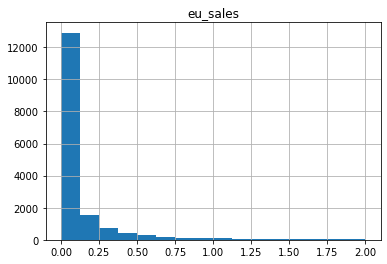

In [41]:
df.hist(column='eu_sales',
        bins=16,
        range=(0,2))   

In [42]:
df['eu_sales'].value_counts()

0.00    5869
0.01    1494
0.02    1308
0.03     926
0.04     709
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: eu_sales, Length: 307, dtype: int64

In [43]:
df['eu_sales'].max()

28.96

In [44]:
df['eu_sales'].isna().sum()

0

В этом столбце пропущенных значений нет, но есть много нулевых значений. Заменим нулевые значения на средние согласно году выпуска игры.

In [45]:
#Создадим новый столбец, в котором указаны средние значения проданных копий игр в европе для каждой строки согласно году выпуска
mean_eu_sales = df.groupby('year_of_release')['eu_sales'].transform('mean')
df['mean_eu_sales']=mean_eu_sales

In [46]:
df['mean_eu_sales']

0        0.127127
1        0.338571
2        0.124653
3        0.130684
4        0.179696
           ...   
16708    0.102032
16709    0.127127
16710    0.102032
16711    0.131075
16712    0.102032
Name: mean_eu_sales, Length: 16713, dtype: float64

In [47]:
df.loc[df['mean_eu_sales'] == 0]['mean_eu_sales'].count()

0

Нулевых средних значений продаж в европе нет.
Поменяем все нулевые значения продаж на средние:

In [48]:
# заполним все пустые значения дохода на медианные значения из нового столбца
df.loc[df['eu_sales'] == 0,'eu_sales'] = df.loc[df['eu_sales'] == 0,'mean_eu_sales']

In [49]:
df.query('eu_sales == 0')['eu_sales'] 

Series([], Name: eu_sales, dtype: float64)

In [50]:
df['eu_sales'].min()

0.01

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37275c4f90>]],
      dtype=object)

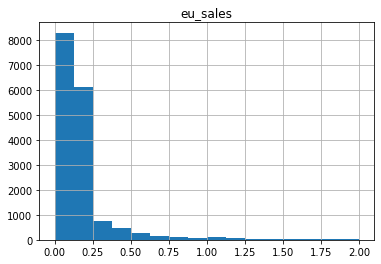

In [51]:
df.hist(column='eu_sales',
        bins=16,
        range=(0,2))   

Данные из этого столбца выглядят адекватно. Пропущенных и нулевых значений нет.

#### Изучим столбец количества продаж в японии:

In [52]:
df.isna().sum()

name                   0
platform               0
year_of_release        0
genre                  0
na_sales               0
eu_sales               0
jp_sales               0
other_sales            0
critic_score        8576
user_score          6699
rating              6764
name_with_sales    16560
mean_na_sales          0
mean_eu_sales          0
dtype: int64

Построим гистограмму распределения количества продаж, по оси х миллионы копий.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727501cd0>]],
      dtype=object)

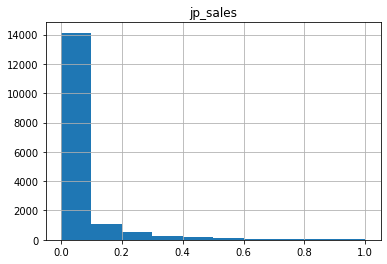

In [53]:
df.hist(column='jp_sales',
        bins=10,
        range=(0,1))   

In [54]:
df['jp_sales'].value_counts()

0.00    10513
0.02      741
0.01      706
0.03      545
0.04      397
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: jp_sales, Length: 244, dtype: int64

In [55]:
df['jp_sales'].max()

10.22

In [56]:
df['jp_sales'].isna().sum()

0

В этом столбце пропущенных значений нет, но есть много нулевых значений. Заменим нулевые значения на средние согласно году выпуска игры.

In [57]:
#Создадим новый столбец, в котором указаны средние значения проданных копий игр в японии для каждой строки согласно году выпуска
mean_jp_sales = df.groupby('year_of_release')['jp_sales'].transform('mean')
df['mean_jp_sales']=mean_jp_sales

In [58]:
df['mean_jp_sales']

0        0.073300
1        1.040000
2        0.041730
3        0.043252
4        0.218403
           ...   
16708    0.038466
16709    0.073300
16710    0.038466
16711    0.044013
16712    0.038466
Name: mean_jp_sales, Length: 16713, dtype: float64

In [59]:
df.loc[df['mean_jp_sales'] == 0]['mean_jp_sales'].count()

108

Для Японии часть средних значений продаж так и остались нулями. Поменяем все возможные нулевые значения продаж на средние:

In [60]:
# заполним все пустые значения дохода на медианные значения из нового столбца
df.loc[df['jp_sales'] == 0,'jp_sales'] = df.loc[df['jp_sales'] == 0,'mean_jp_sales']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372746b250>]],
      dtype=object)

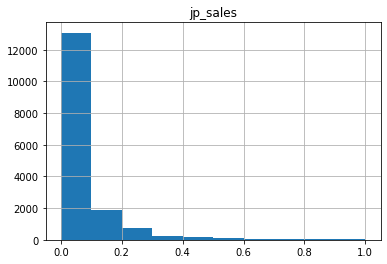

In [61]:
df.hist(column='jp_sales',
        bins=10,
        range=(0,1))   

Данные из этого столбца выглядят адекватно. Пропущенных значений нет, нулевых осталось 108, они не должны повлиять на анализ.

#### Изучим столбец количества продаж в других странах:

Построим гистограмму распределения количества продаж, по оси х миллионы копий.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727439790>]],
      dtype=object)

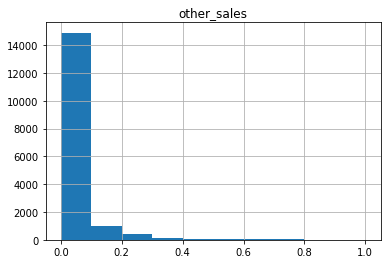

In [62]:
df.hist(column='other_sales',
        bins=10,
        range=(0,1))   

In [63]:
df['other_sales'].value_counts()

0.00    6600
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: other_sales, Length: 155, dtype: int64

In [64]:
df['other_sales'].max()

10.57

In [65]:
df['other_sales'].isna().sum()

0

В этом столбце пропущенных значений нет, но есть много нулевых значений. Заменим нулевые значения на средние согласно году выпуска игры.

In [66]:
#Создадим новый столбец, в котором указаны средние значения проданных копий игр в других странах для каждой строки согласно году выпуска
mean_other_sales = df.groupby('year_of_release')['other_sales'].transform('mean')
df['mean_other_sales']=mean_other_sales

In [67]:
df['mean_other_sales']

0        0.053628
1        0.065714
2        0.056033
3        0.051125
4        0.029240
           ...   
16708    0.028845
16709    0.053628
16710    0.028845
16711    0.032613
16712    0.028845
Name: mean_other_sales, Length: 16713, dtype: float64

In [68]:
df.loc[df['mean_other_sales'] == 0]['mean_other_sales'].count()

0

Нулевых средних значений продаж в европе нет.
Поменяем все нулевые значения продаж на средние:

In [69]:
# заполним все пустые значения дохода на медианные значения из нового столбца
df.loc[df['other_sales'] == 0,'other_sales'] = df.loc[df['other_sales'] == 0,'mean_other_sales']

In [70]:
df.query('other_sales == 0')['other_sales'] 

Series([], Name: other_sales, dtype: float64)

In [71]:
df['other_sales'].min()

0.006956521739130438

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727388350>]],
      dtype=object)

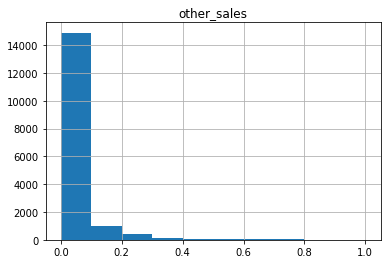

In [72]:
df.hist(column='other_sales',
        bins=10,
        range=(0,1))   

Данные из этого столбца выглядят адекватно. Пропущенных и нулевых значений нет.

#### Изучим столбец оценки пользователей:

Посмрим, какие значения тут встречаются:

In [73]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [74]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.7       2
0.5       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

В столбце присутствует значение tbd, что означает "подлежит уточнению". Заменим эти значения на Nan.

In [75]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan

In [76]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Сейчас столбец принадлежит типу object. Переведём его во float, чтобы можно было работать с числами.

In [77]:
df['user_score'] = df['user_score'].astype('float')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727306310>]],
      dtype=object)

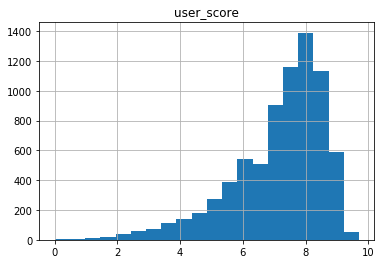

In [78]:
df.hist(column='user_score',
        bins=20)  

Данные выглядят адекватно. Посмотрим, сколько пропущеных значений в этом столбце:

In [79]:
df['user_score'].isna().sum()

9123

Пропусков очень много... Попробуем заменить их на оценку коритиков, разделённую на 10 (поскольку максимальные баллы критиков и игроков отличаются в 10 раз).

In [80]:
df.loc[df['user_score'].isna()]['critic_score'].unique()

array([nan, 85., 61., 88., 83., 71., 73., 55., 65., 63., 37., 64., 58.,
       76., 54., 59., 51., 80., 74., 66., 60., 44., 42., 86., 69., 68.,
       53., 75., 49., 70., 43., 46., 90., 67., 77., 78., 62., 89., 81.,
       47., 56., 52., 34., 45., 72., 57., 82., 26., 50., 84., 48., 36.,
       41., 33., 40., 39., 79., 87., 38., 35., 32., 28., 27., 31., 30.,
       23.])

In [81]:
# заполним все возможные пустые значения на значения равные оценки критиков / 10:
df.loc[df['user_score'].isna(),'user_score'] = df.loc[df['user_score'].isna(),'critic_score']/10

Округлим все значения в столбце до десятичной части, чтобы новые оценки имели такой же разряд, что и старые.

In [82]:
df['user_score'].round(1)

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16708    NaN
16709    NaN
16710    NaN
16711    NaN
16712    NaN
Name: user_score, Length: 16713, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f372724d390>]],
      dtype=object)

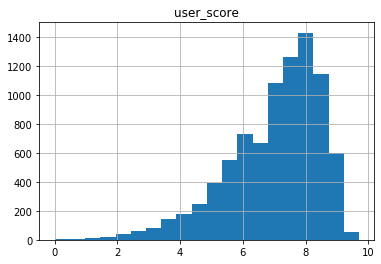

In [83]:
df.hist(column='user_score', bins=20)  

In [84]:
df['user_score'].isna().sum()

8003

График немного изменился, но всё ещё выглядит нормальным. Пропущенных значений в столбце теперь 8003.

#### Изучим столбец оценки критиков:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727189050>]],
      dtype=object)

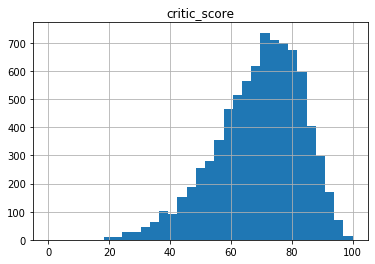

In [85]:
df.hist(column='critic_score',
        bins=33,
        range=(0,100))  

In [86]:
df['critic_score'].isna().sum()

8576

Данные выглядят адекватно.
Пропусков очень много... Попробуем заменить их на оценку игроков, умноженную на 10 (поскольку максимальные баллы критиков и игроков отличаются в 10 раз).

In [87]:
df.loc[df['critic_score'].isna()]['user_score'].unique()

array([nan, 4.8, 4.9, 4.5, 8.2, 6.2, 8. , 4.2, 7.7, 7. , 7.6, 3.2, 6.7,
       9. , 8.6, 8.3, 7.4, 6.6, 5.5, 8.4, 8.5, 4.7, 5.1, 7.8, 3. , 8.1,
       2.9, 6.5, 2.7, 2.5, 7.1, 4.3, 3.5, 7.3, 5. , 6.8, 7.2, 2.8, 5.2,
       3.1, 4.6, 3.3, 0. , 1.6, 5.4, 6. , 5.3, 3.8, 3.4, 6.4, 7.9, 6.1,
       8.9, 5.6, 2.4, 5.8, 8.7, 5.7, 7.5, 9.2, 1.8, 4.4, 1.7, 9.1, 1.1,
       8.8, 6.3, 0.3, 4.1, 3.7, 5.9, 0.7, 6.9, 2. , 1.3, 0.2, 9.5, 1.4,
       9.3, 0.9, 4. , 9.7, 1.2, 3.9, 0.6])

In [88]:
# заполним все возможные пустые значения на значения равные оценки пользователей * 10:
df.loc[df['critic_score'].isna(),'critic_score'] = df.loc[df['critic_score'].isna(),'user_score'] * 10

Распределение осталось такимже, но данных немного добавилось.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3726f8a310>]],
      dtype=object)

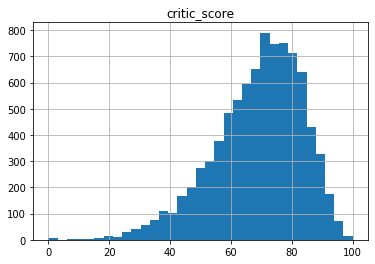

In [89]:
df.hist(column='critic_score',
        bins=33,
        range=(0,100)) 

In [90]:
df['critic_score'].isna().sum()

8003

#### Изучим столбец возрастного рейтинга:

In [91]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [92]:
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Посмотрим, что означают категории:

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет.

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Первоначально "K-A" ("Kids to Adults")

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». 

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. 

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. 

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Получается, RP можно приравнять к отсутствующему значению, а K-A поменять на Е. Сделаем это:

In [93]:
df.loc[df['rating'] == 'RP','rating'] = np.nan

In [94]:
df.loc[df['rating'] == 'K-A','rating'] = 'E'

In [95]:
df['rating'].value_counts()


E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64

Построим распределение количества игр по возрастным оценкам:

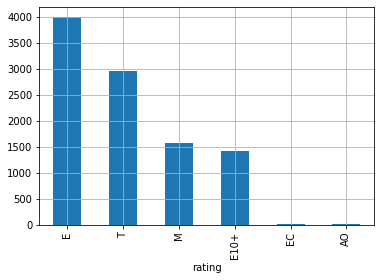

In [96]:
df.groupby('rating')['rating'].agg('count').sort_values(ascending=False).plot(y='rating', kind='bar',grid=True)

In [97]:
df['rating'].isna().sum()

6767

В данном столбце много пропусков, но заполнить их нет возможности. Оставим их.

### Преобразование типов данных

При предобработке данных были преобразованы только два типа столбца:

- Год выпуска игры преобразовали из float в int, поскольку год является целочисленным значением.


- Оценку пользователей из object преобразовали во float, поскольку это числа.

### Обработка пропусков:



Поскольку данные достались из открытых источников, они могут содержать много пропусков, потому что на разных платформах могли не публиковать рейтинги критиков или игроков. 
Возрастной рейтинг могли или не успеть назначить, или его тоже не указывали в базах, откуда взята информация.
Пропуски в названии игры и жанра странные - больше похожи на системный сбой.

Обработка пропусков была следующая:
- название столбца : было пропусков -- стало пропусков


- Name                  2 -- 0 - удалили строки, содержащие пропуски
- Platform              0 -- 0
- Year_of_Release     269 -- 0 - заменили пропуски на медианные значения согласно платформе, на которую выпускалась игра
- Genre                 2 -- 0 - удалили строки, содержащие пропуски
- NA_sales              0 -- 0
- EU_sales              0 -- 0
- JP_sales              0 -- 0
- Other_sales           0 -- 0
- Critic_Score       8578 -- 8003 - уменьшили количество пропусков подставив где возможно оценку пользователей умноженную на 10
- User_Score         6701 -- 8003 - уменьшили количество пропусков подставив где возможно оценку критиков разделённую на 10. Количество пропусков выросло, поскольку до этого в пропусках не учитывалось значение tbd.
- Rating             6766 -- 6767 - удалили строки с именем или жанром, но добавили пустые строки при учёте значения "рейтинг ожидается".


### Суммарные продажи во всех регионах

In [99]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Построим гистограмму количества игр по всем продажам, млн.копий:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6d744d50>]],
      dtype=object)

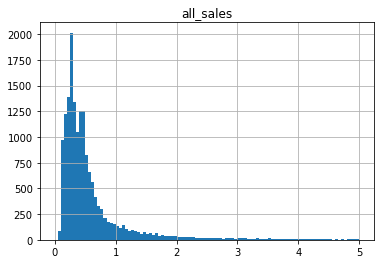

In [100]:
df.hist(column='all_sales',
        bins=100,
        range=(0,5))   

### Выводы

Во время предобработки данных где возможно были обработаны пропуски в значениях, приведены типы данных.

Посчитали суммарные продажи во всех регионах.

В целом данные выглядят адекватно, есть выбросы в количестве проданных копий и есть игры с нулевым количеством продаж и отсутствием рейгингов, это мы учтём при последующем анализе.

## Исследовательский анализ данных



### Количество игр распределённое по годам

Построим распределения количества игр, в зависимости от года выпуска:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6d554b50>]],
      dtype=object)

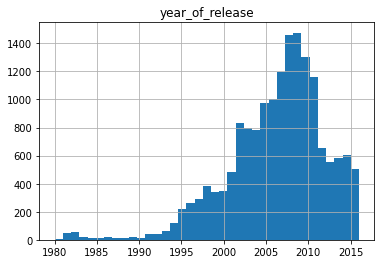

In [101]:
df.hist(column='year_of_release',
              bins=37)   

До двухтысячных выпускалось не так много игр, как после 2005го года. Это связано с тем, что индустрия игр только начала развиваться.

Поскольку нам необходимо сделать прогноз на 2017ый год, возьмём данные за 2008-2016 года, этого будет достаточно для прогноза.

In [102]:
df_choise_years = df.query('year_of_release >= 2008')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f6d48d990>]],
      dtype=object)

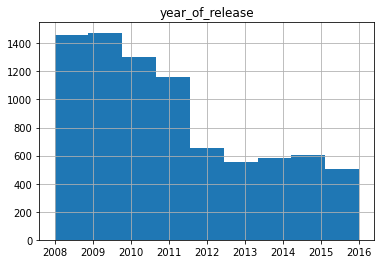

In [103]:
df_choise_years.hist(column='year_of_release',
              bins=9)   

### Изменение количества продаж по платформам.

Посмотрим, сколько миллионов копий было продано каждой игры для всех платформ за все годы:

In [104]:
all_platform_list=list(df['platform'].unique())

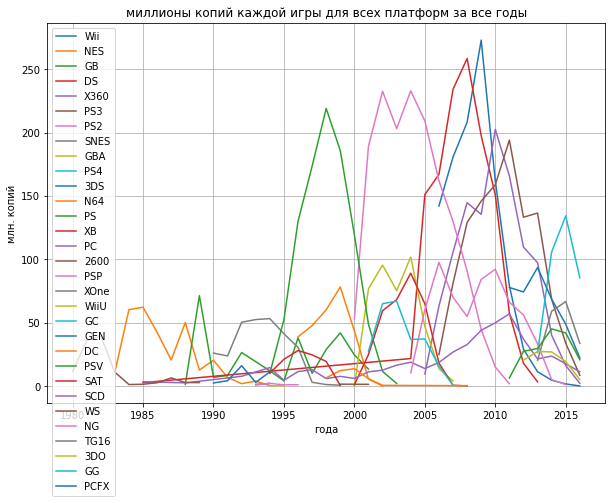

In [105]:
for platform in all_platform_list:
  (df[df['platform'] == platform]
   .groupby('year_of_release')['all_sales'].sum()
   .plot(grid=True, label=platform, figsize=(10,7))
   )
plt.title('миллионы копий каждой игры для всех платформ за все годы')
plt.xlabel('года')
plt.ylabel('млн. копий')
plt.legend()
plt.show()

Уберём из графика все непопулярные платформы. Будем считать непопулярными платформы, где сумарные продажи меньше 500 мнл.копий:

In [106]:
popular_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()
popular_platform

,platform,all_sales
0,PS2,1565.669880
1,DS,1263.225156
2,PS3,1115.420346
3,X360,1093.637230
4,Wii,1092.751941
5,PS,953.545660
6,PSP,632.891270
7,PC,493.057153
8,GBA,415.283920
9,3DS,385.853060


In [107]:
popular_platform = popular_platform.loc[popular_platform['all_sales'] > 500]
popular_platform


,platform,all_sales
0,PS2,1565.669880
1,DS,1263.225156
2,PS3,1115.420346
3,X360,1093.637230
4,Wii,1092.751941
5,PS,953.545660
6,PSP,632.891270


In [108]:
popular_platform_list=list(popular_platform['platform'])

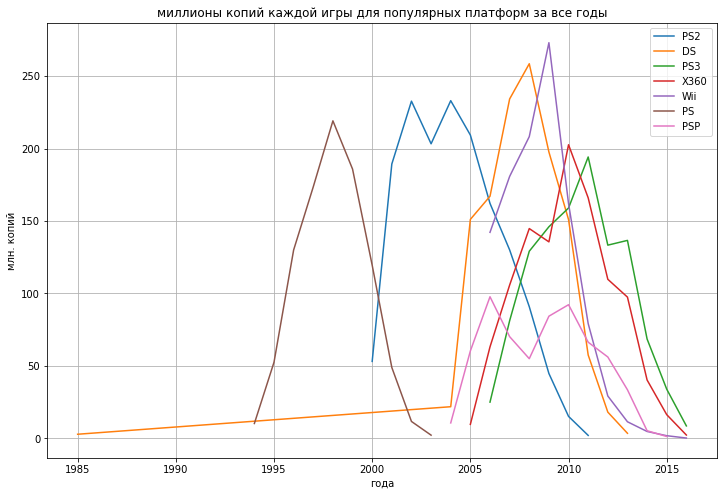

In [109]:
for platform in popular_platform['platform']:
  (df[df['platform'] == platform]
   .groupby('year_of_release')['all_sales'].sum()
   .plot(grid=True, label=platform, figsize=(12,8))
   )
plt.title('миллионы копий каждой игры для популярных платформ за все годы')
plt.xlabel('года')
plt.ylabel('млн. копий')
plt.legend()
plt.show()

Можно заметить характерный срок, за который появляются и исчезают платформы - 7 лет:
- для PS это 6 лет,
- для PS2 это 9 лет,
- для DS это 6 лет,
- для PS3 это 8 лет,
- для X360 это 8 лет,
- для Wii это 7 лет,
- для PSP это 7 лет.

### Данные за актуальный период. 


Выведем список всех платформ, находящихся в обзоре на 2008-2016 года:

In [110]:
platform_list=list(df_choise_years['platform'].unique())
platform_list

['Wii',
 'X360',
 'PS3',
 'DS',
 'PS4',
 '3DS',
 'PC',
 'XOne',
 'WiiU',
 'PSP',
 'PS2',
 'PSV',
 'XB',
 'DC']

Посмотрим, сколько миллионов копий было продано каждой игры для платформ в 2008-2016х годах:

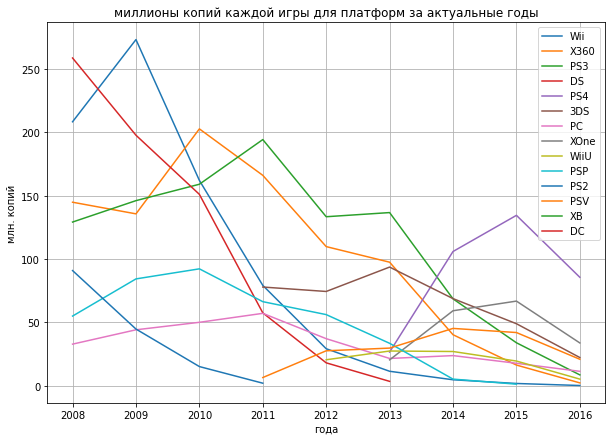

In [111]:
for platform in platform_list:
  (df_choise_years[df_choise_years['platform'] == platform]
   .groupby('year_of_release')['all_sales'].sum()
   .plot(grid=True, label=platform, figsize=(10,7))
   )
plt.title('миллионы копий каждой игры для платформ за актуальные годы')
plt.xlabel('года')
plt.ylabel('млн. копий')
plt.legend()
plt.show()

Количество проданных копий резко падает в 2016ом году, поскольку данные за 2016й год неполные.

### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.


Поскольку данные за 2016й год неполные, не будем на них сильно опираться.
На предыдущем графике видно, что сейчас развивается платформа PS4, начали расти платформы PSV и XOne.


### Построим график «ящик с усами» по глобальным продажам игр в разбивке по популярным платформам. 

In [149]:
popular_platform_list

['PS2', 'DS', 'PS3', 'X360', 'Wii', 'PS', 'PSP']

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0.0, 4.0)

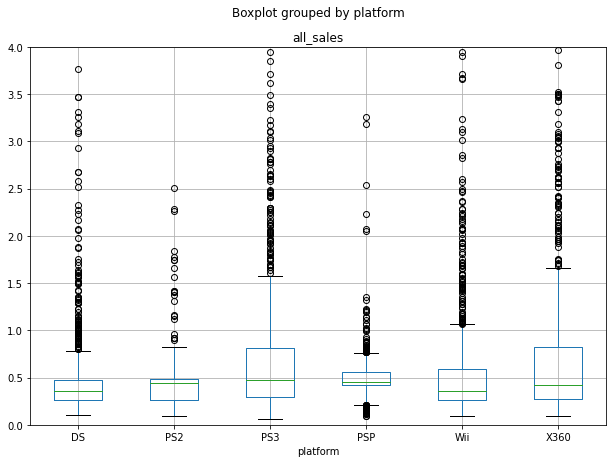

In [148]:
axes = df_choise_years.query('platform in @popular_platform_list').boxplot('all_sales',by='platform', figsize=(10,7))
plt.ylim(0,4)

График показывает как отличается медианное количество проданных копий игр для разных платформ за год (для 2008-2016х годов. Медианное значение варьируется от 0,3 до 0,5 млн. проданных копий в год.

На всех платформах (кроме PSP) минимальное количество проданных копий игр в год составляет 0,1 млн. копий. А вот межквартильный размах очень сильно различается: половина всех значений продаж находится то в промежутке 4,5-5,5 мнл, то 0,3-0,8.

Во всех платформах кроме PS2 присутствуют экстримальные значения, такие как 30 млн. копий в год.

### Влияние на продажи отзывов пользователей и критиков для платформыплатформы PS3



Выделим из датафрейма за интересующие года данные, где количество продаж больше нуля, а также оценки критиков и пользователей не равны нулям:

In [113]:
df_filtred_score = df_choise_years.loc[df_choise_years['all_sales'] > 0]
df_filtred_score = df_filtred_score.loc[df_filtred_score['critic_score'] > 0] #оценки пользователей при этом условии тоже >0

In [144]:
def scatterplot_platform_func(pop_platform):
  df_filtred_score_platform = df_filtred_score.query('platform == @pop_platform')
  # Создадим одну строку с двумя колонками
  fig, axes = plt.subplots(1, 2, figsize=(14, 4))
  fig.suptitle(f'Распределения зависимости количества проданных игр от оценки для платформы {pop_platform}')
  axes[0].set_title('Оценки критиков')
  axes[1].set_title('Оценки игроков')

  sns.scatterplot(data=df_filtred_score_platform, x="critic_score", y="all_sales", ax=axes[0])
  sns.scatterplot(data=df_filtred_score_platform, x="user_score", y="all_sales",ax=axes[1])

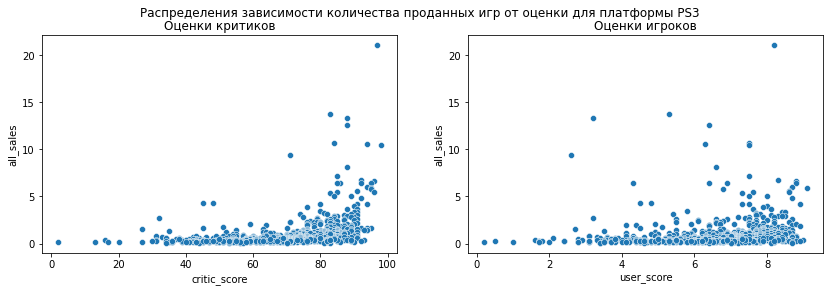

In [145]:
scatterplot_platform_func('PS3')

Корреляция между проданными играми и оценками критиков, оценками игроков:

In [116]:
df_filtred_score_PS3['all_sales'].corr(df_filtred_score_PS3['critic_score'])

0.3825350305791178

In [117]:
df_filtred_score_PS3['all_sales'].corr(df_filtred_score_PS3['user_score'])

0.12046829710285162

В данных очень много значений, где проданных копий мало, а оценки самые разные. В целом прослеживается зависимость между высокими оценками и увеличением количеством продаж. 
Можно заметить игру, проданную за год более 20 млн. раз, при этом оценки пользователей и критиков очень высокие для неё.

Присутствует корреляция между оценками критиков и количеством продаж, а вот между оценками игроков и количеством продаж корреляции почти нет.

### Соотнесём выводы с продажами игр на других платформах.


In [118]:
popular_platform_list

['PS2', 'DS', 'PS3', 'X360', 'Wii', 'PS', 'PSP']

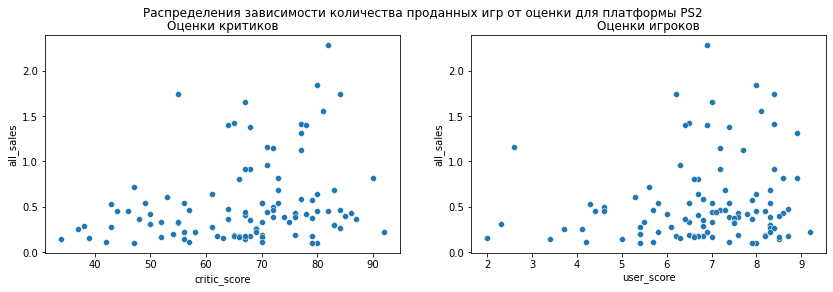

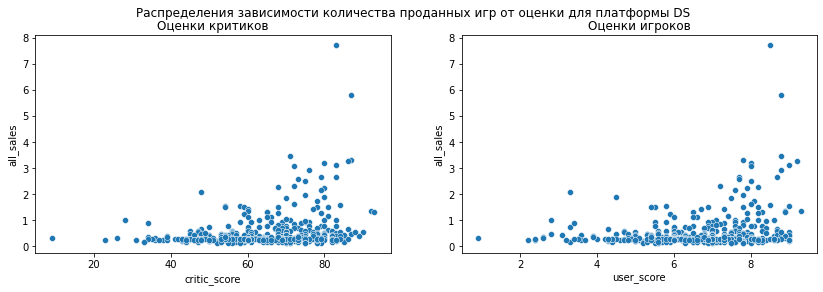

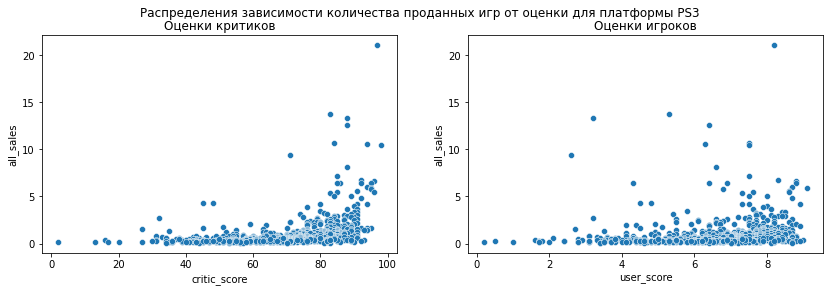

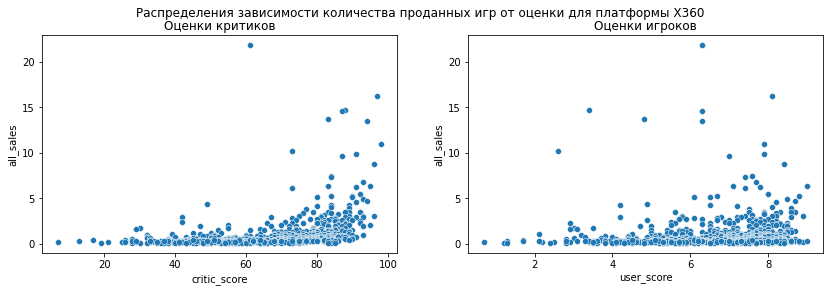

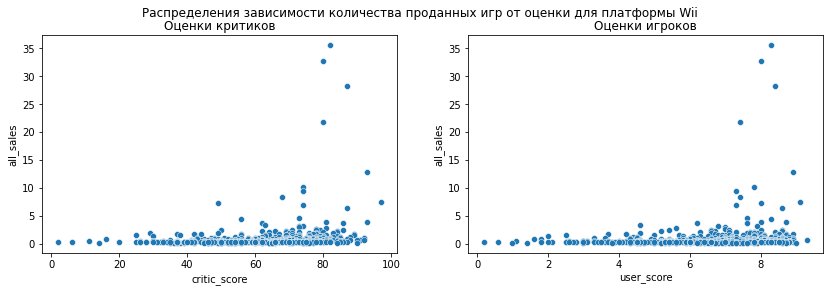

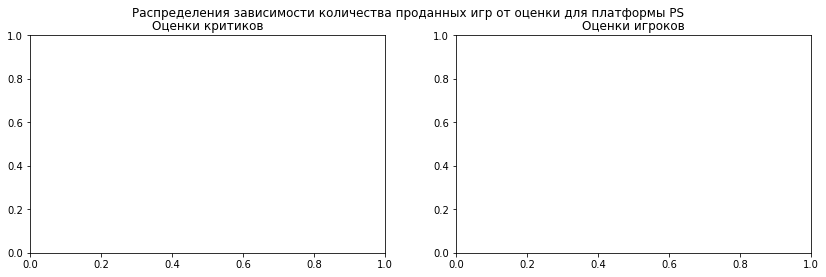

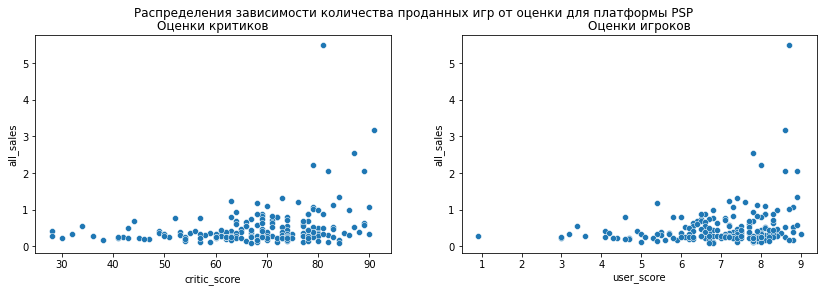

In [146]:
for platfornm in popular_platform_list:
  scatterplot_platform_func(platfornm)

Для платформы PS диаграмма рассеяния не построилась. Это связано с тем, что для этой платформы в таблице отсутствуют оценки критиков и пользователей.

В целом, можно сказать, что распределения по другим платформам аналогичны распределениям для платформы PS3. и выводы можно распространить на все платформы.

### Посмотрим на общее распределение игр по жанрам.

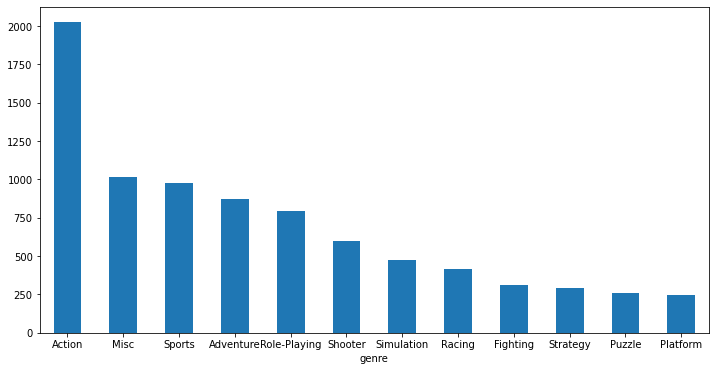

In [122]:
df_choise_years.groupby(['genre'])['genre'].count().sort_values(ascending=False).plot.bar(x='genre', y='genre', rot=0, figsize=(12,6))

В данных больше всего игр, выпущенных в жанре Экшн. Посмотрим на количествво проданных копий игр в каждом жанре:

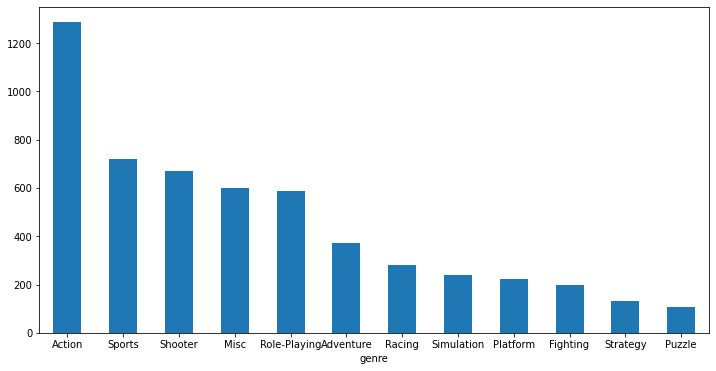

In [123]:
df_choise_years.groupby(['genre'])['all_sales'].sum().sort_values(ascending=False).plot.bar(x='genre', y='all_sales', rot=0, figsize=(12,6))

Самые прибыльные игры производятся в жанре Action. Потом можно выделить сегмент с высокой прибылью: это игры в жанрах Спорт, Шутер, Разное и РПГ.
 
Жанр игр Головоломки имеет самые низкие продажи, в 12 раз ниже, чем самые продаваемые игры.

## Шаг 4. Составим портрет пользователя каждого региона (NA, EU, JP):


In [124]:
reg_list = ['na_sales','eu_sales','jp_sales']

### Самые популярные платформы (топ-5)



Построим распределения количества проданных копий игр в зависимости от игровой платформы по разным регионам:

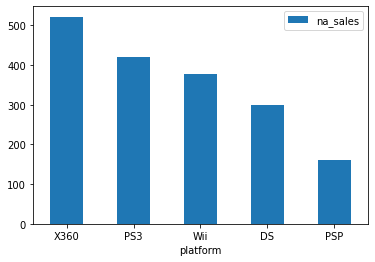

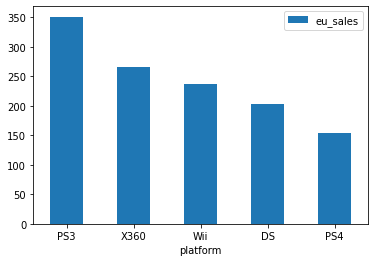

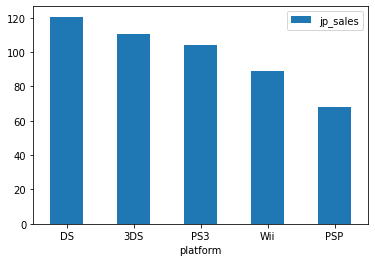

In [125]:
for region in reg_list:
  region_platform_stat = df_choise_years.groupby(['platform'])[region].sum().sort_values(ascending=False).reset_index().head(5)
  region_platform_stat.plot(x='platform', y=region, kind='bar', rot=0)

Получается, что в северной америке пользователь предпочитают играть на Х360, PS3, Wii, DS, DSP. Игроки из Европы играют на тех же платформах, за исключением PSP. Вместо неё они предпочитают PS4. Таже в Европе лидирует платформа PS3.

В Японии лидируют небольшие игровые приставки DS и 3DS. Потом PS3, Wii и PSP.


Исходя из количества проданных копий можно утверждать, что что в северной Америке Игроков сильно больше, чем в Европе и Японии.

Такая разница в предпочтении платфор могла возникнуть из-за разных потребностей пользователей, DS и 3DS можно брать с собой везде, а PS3 и X360 являются стационарными платформами.

### Самые популярные жанры


Построим распределения количества проданных копий игр в зависимости от жанра по разным регионам:

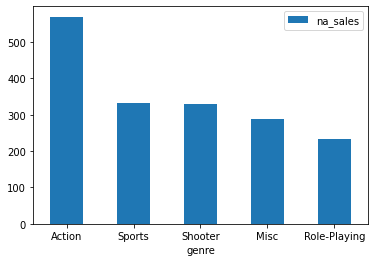

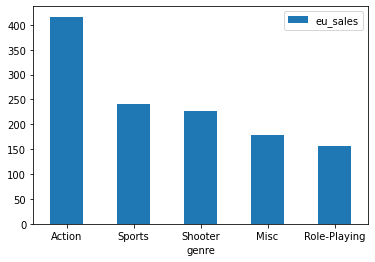

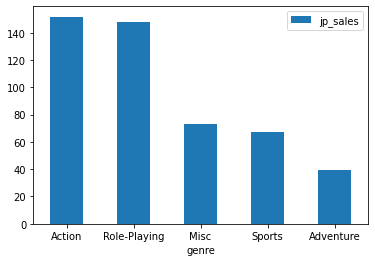

In [126]:
for region in reg_list:
  region_genre_stat = df_choise_years.groupby(['genre'])[region].sum().sort_values(ascending=False).reset_index().head(5)
  region_genre_stat.plot(x='genre', y=region, kind='bar', rot=0)


Во всех странах лидирует жанр Action, а также везде присутствует жанр Misc.
Предпочтения жанров у игроков Европы и северной америки полностью совпали, а вот в Японии пользователи предпочитают другие типы игр: РПГ продаются на уровне Экшена, так же в топ-5 зашли игры-приключения (А вот шутеров в лидерах нет).

Такое может происходить из-за различных предпочтений людей из разных стран, их различного культурного кода и возраста игроков.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Построим распределения количества проданных копий игр в зависимости от возрастного рейтинга по разным регионам:

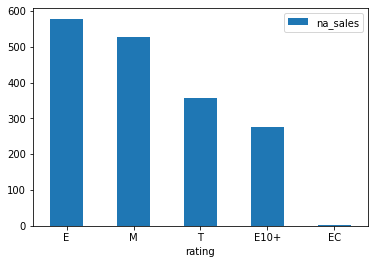

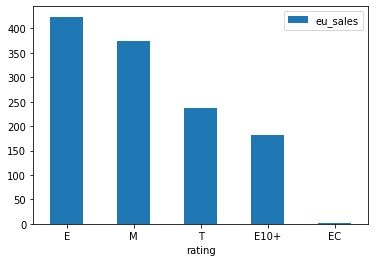

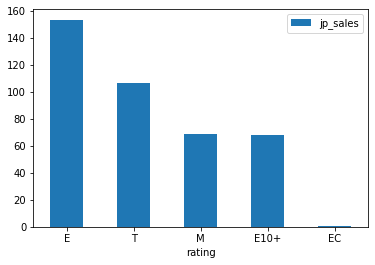

In [127]:
for region in reg_list:
  region_rating_stat = df_choise_years.groupby(['rating'])[region].sum().sort_values(ascending=False).reset_index()
  region_rating_stat.plot(x='rating', y=region, kind='bar', rot=0)

- «E» — «Для всех»
- «T» — «Подросткам»
- «M» — «Для взрослых»
- «E10+»  — «Для всех от 10 лет и старше»
- «EC»  — «Для детей младшего возраста»

Похоже, что рейтинг ESRB влияет на продажи в Японии: игры с рейтингом "Для взрослых" на много хуже продаются.






## Шаг 5. Проверим гипотезы



Истинные средние генеральных совокупностей могут быть равны или очень близки, а разница между выборочными средними случайно оказаться относительно большой. Статистический тест нужен, чтобы оценить вероятность этого.

Для этого необходимо предположить гипотезу и проверить её.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Это нулевая гипотеза H₀. Альтернативная гипотеза H₁: "Средние пользовательские рейтинги платформ Xbox One и PC различаются". Проверим, можно ли отвергнуть нулевую гипотезу.

Альтернативная гипотеза H₁ - это утверждение, которое принимается верным, если отбрасывается H₀.

alpha = 0.01 критический уровень статистической значимости. если p-value окажется меньше него - отвегнем гипотезу.

Запишем выборки в отдельные таблицы:

In [128]:
df_x_one = df_choise_years.loc[df_choise_years['platform'] == 'XOne']
df_x_one = df_x_one.loc[df_choise_years['all_sales'] > 0]
df_x_one = df_x_one.loc[df_choise_years['user_score'] > 0]['all_sales']
df_x_one.count()

186

In [129]:
df_pc = df_choise_years.loc[df_choise_years['platform'] == 'PC']
df_pc = df_pc.loc[df_choise_years['all_sales'] > 0]
df_pc = df_pc.loc[df_choise_years['user_score'] > 0]['all_sales']
df_pc.count()

537

Выборки разного размера, поэтому можно предположить, что дисперсии у генеральных совокупностей разные

In [130]:
results = st.ttest_ind(df_x_one, df_pc, equal_var=False)

In [131]:
results.pvalue

1.3452673168983515e-05

Полученное значение p-value = 0.00135% говорит о том, что если нулевая гипотеза верна, вероятность получить такие выборки очень мала.

Отвергаем нулевую гипотезу.

Принимаем гипотезу "Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Посмотрим, какие средние значения у двух выборок:

In [151]:
df_x_one._mean =df_x_one.mean()
df_x_one._mean

0.801574093625797

In [154]:
df_pc_mean =df_pc.mean()
df_pc_mean

0.4598573384741412

Это значит, что средние пользовательские рейтинги платформы Xbox One отличаются от рейтингов платформы PC в большую сторону. 

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Это альтернативная гипотеза H₁ 

Нулевая гипотеза H₀: "Средние пользовательские рейтинги жанров Action и Sports одинаковые". Проверим, можно ли отвергнуть нулевую гипотезу.


alpha = 0.01 критический уровень статистической значимости. если p-value окажется меньше него - отвегнем гипотезу.

Запишем выборки в отдельные таблицы:

In [132]:
df_action = df_choise_years.loc[df_choise_years['genre'] == 'Action']
df_action = df_action.loc[df_choise_years['all_sales'] > 0]
df_action = df_action.loc[df_choise_years['user_score'] > 0]['all_sales']
df_action.count()

1186

In [133]:
df_sports = df_choise_years.loc[df_choise_years['genre'] == 'Sports']
df_sports = df_sports.loc[df_choise_years['all_sales'] > 0]
df_sports = df_sports.loc[df_choise_years['user_score'] > 0]['all_sales']
df_sports.count()

566

Выборки разного размера, поэтому можно предположить, что дисперсии у генеральных совокупностей разные

In [134]:
results = st.ttest_ind(df_action, df_sports, equal_var=False)

In [135]:
results.pvalue

0.08545768107072274

Полученное значение p-value = 8% оно говорит о том, что если нулевая гипотеза верна, вероятность получить такие выборки велика.

Не отвергаем нулевую гипотезу.

Гипотезу "средние пользовательские рейтинги жанров Action и Sports разные" отвергаем.

## Общий вывод

Изучили и проанализировали данные по компьютерным играм интернет-магазина «Стримчик». Предобработали данные, привели к соответствующим типам некоторые столбцы, а названия столбцов привели в соответствие хорошему стилю.

Добавили в таблицу данные по суммарным проданным копиям игр со всех регионов.

Изучили следующие параметры:

- сколько игр выпускалось в разные годы. Выбрали годы, актуальные для данного исследования.
- Посмотрели, как менялись продажи по платформам. Нашли характерный срок, за который появляются новые и исчезают старые платформы.
- Посмотрели, какие платформы лидируют по продажам, растут, падают. Выбрали несколько потенциально прибыльных платформ.
- Посмотрели, как влияют на продажи для популярных платформ отзывы пользователей и критиков. 
- Посмотрели на общее распределение игр по жанрам. Выделили самые прибыльные жанры. 

- Для каждого региона (NA, EU, JP) нашли топ-5 популярных платформ и  жанров.
- Проверили влияние рейтинга ESRB на продажи в регионах.

Были сформулированы две нулевые гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - отвергли данную гипотезу;
- Средние пользовательские рейтинги жанров Action и Sports одинаковые - не отвергли гипотезу.



Средние пользовательские рейтинги платформы Xbox One отличаются от рейтингов платформы PC в большую сторону.

Средние пользовательские рейтинги жанров Action и Sports одинаковые.
